In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import randint

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

train_df = pd.read_csv('mental.csv')
print(train_df.shape)
print(train_df.describe())
print(train_df.info())

(1259, 29)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 29 columns):
Timestamp                                                                            1259 non-null object
Age                                                                                  1259 non-null int64
Gender                                                                               1259 non-null object
Country                                                                              1259 non-null object
state                                                                                744 non-null object
self_employed                                                                        1241 non-null object
family_history                                                      

In [2]:
train_df = train_df.drop(['comments'], axis= 1)
train_df = train_df.drop(['state'], axis= 1)
train_df = train_df.drop(['Timestamp'], axis= 1)

train_df.isnull().sum().max()
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Have you had a mental health disorder in the past?,Have you been diagnosed with a mental health condition by a medical professional?
0,37,Female,United States,NaN,No,Yes,Often,Jun-25,No,Yes,...,No,No,Some of them,Yes,No,Maybe,Yes,No,Yes,Yes
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Maybe,No,No,No,No,No,Don't know,No,Yes,Yes
2,32,Male,Canada,NaN,No,No,Rarely,Jun-25,No,Yes,...,No,No,Yes,Yes,Yes,Yes,No,No,Maybe,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Yes,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Yes,Yes


In [3]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help','Have you had a mental health disorder in the past?',
                  'Have you been diagnosed with a mental health condition by a medical professional?']
floatFeatures = []
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head(5)   

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Have you had a mental health disorder in the past?,Have you been diagnosed with a mental health condition by a medical professional?
0,37,Female,United States,NaN,No,Yes,Often,Jun-25,No,Yes,...,No,No,Some of them,Yes,No,Maybe,Yes,No,Yes,Yes
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Maybe,No,No,No,No,No,Don't know,No,Yes,Yes
2,32,Male,Canada,NaN,No,No,Rarely,Jun-25,No,Yes,...,No,No,Yes,Yes,Yes,Yes,No,No,Maybe,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Yes,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Yes,Yes


In [4]:
gender = train_df['Gender'].str.lower()
gender = train_df['Gender'].unique()
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

print(train_df['Gender'].unique())

['female' 'male' 'trans']


In [5]:
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [6]:
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [7]:
train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [8]:
train_df.to_csv('mental1.csv')

In [9]:
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_emp

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Have you had a mental health disorder in the past?,Have you been diagnosed with a mental health condition by a medical professional?,age_range
0,19,0,0,0,1,2,4,0,1,2,...,1,1,2,1,0,2,0,2,1,2
1,26,1,0,0,0,3,5,0,0,0,...,1,0,0,1,1,0,0,2,1,2
2,14,1,0,0,0,3,4,0,1,1,...,1,2,2,2,2,1,0,0,0,2
3,13,1,0,1,1,2,2,0,1,1,...,2,1,0,0,0,1,1,2,1,2
4,13,1,0,0,0,1,1,1,1,2,...,1,1,2,2,2,0,0,2,1,2


In [10]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                                                    Total  Percent
age_range                                               0      0.0
Have you been diagnosed with a mental health co...      0      0.0
Gender                                                  0      0.0
self_employed                                           0      0.0
family_history                                          0      0.0
treatment                                               0      0.0
work_interfere                                          0      0.0
no_employees                                            0      0.0
remote_work                                             0      0.0
tech_company                                            0      0.0
benefits                                                0      0.0
care_options                                            0      0.0
wellness_program                                        0      0.0
seek_help                                               0     

In [11]:
train_df.to_csv('mental2.csv')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

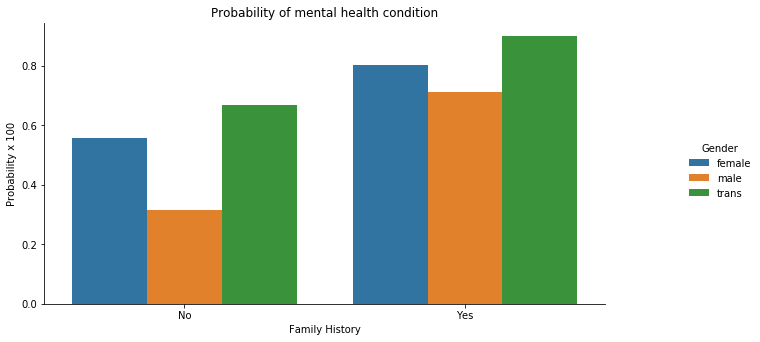

In [13]:
o = labelDict['label_family_history']
g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

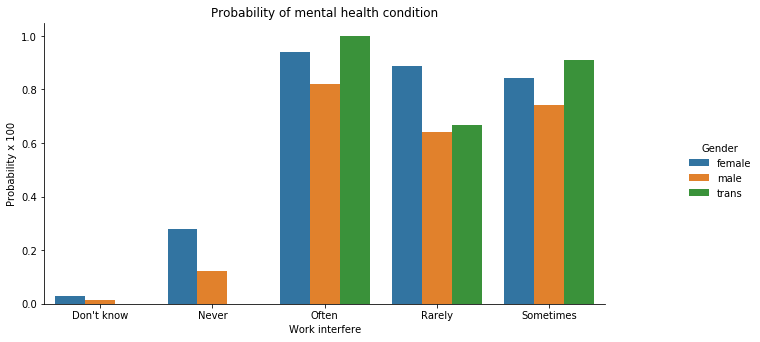

In [14]:
o = labelDict['label_work_interfere']
g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

In [15]:
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Have you had a mental health disorder in the past?,Have you been diagnosed with a mental health condition by a medical professional?,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,1,1,2,1,0,2,0,2,1,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,1,0,0,1,1,0,0,2,1,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,2,2,2,2,1,0,0,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,2,1,0,0,0,1,1,2,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,1,1,2,2,2,0,0,2,1,2


In [16]:
# define X and y
feature_cols = ['age_range', 'Gender', 'self_employed', 'family_history', 'work_interfere','remote_work','wellness_program', 'seek_help','mental_health_consequence','coworkers','Have you had a mental health disorder in the past?']
X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

In [17]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    a=metrics.accuracy_score(y_test, y_pred_class)*100
    print('Accuracy:', a)
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    #Confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)

    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    # print the first 10 predicted responses
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)

        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob, 0.3)[0]
    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    
    return accuracy

In [18]:
def tuningRandomizedSearchCV(model, param_dist):
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    #rand.grid_scores_
    rand.cv_results_
    
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [19]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)
    
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = tree.predict(X_test)
    
    print('Decision Tree')
    
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Tree clas.'] = accuracy_score * 100

C:\Users\Vidit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Rand. Best Score:  0.8305489260143198
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 8}


C:\Users\Vidit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Vidit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Vidit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Vidit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: Deprecation

[0.831, 0.831, 0.831, 0.83, 0.814, 0.831, 0.831, 0.831, 0.831, 0.809, 0.831, 0.828, 0.831, 0.811, 0.831, 0.831, 0.823, 0.831, 0.831, 0.831]
Decision Tree
Accuracy: 0.819047619047619
Accuracy: 81.9047619047619
Null accuracy:
 1    160
0    155
Name: treatment, dtype: int64
Percentage of ones: 0.5079365079365079
Percentage of zeros: 0.4920634920634921
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


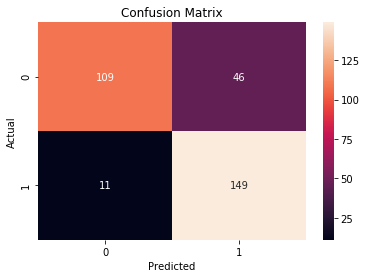

Classification Accuracy: 0.819047619047619
Classification Error: 0.18095238095238098
False Positive Rate: 0.2967741935483871
Precision: 0.764102564102564
AUC Score: 0.8172379032258065
Cross-validated AUC: 0.8507412474398363
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.1369863  0.8630137 ]
 [1.         0.        ]
 [1.         0.        ]
 [0.93814433 0.06185567]
 [0.37777778 0.62222222]
 [0.1369863  0.8630137 ]
 [0.93814433 0.06185567]
 [0.1440678  0.8559322 ]
 [0.37777778 0.62222222]
 [0.37777778 0.62222222]]
First 10 predicted probabilities:
 [[0.8630137 ]
 [0.        ]
 [0.        ]
 [0.06185567]
 [0.62222222]
 [0.8630137 ]
 [0.06185567]
 [0.8559322 ]
 [0.62222222]
 [0.62222222]]
[[109  46]
 [ 11 149]]


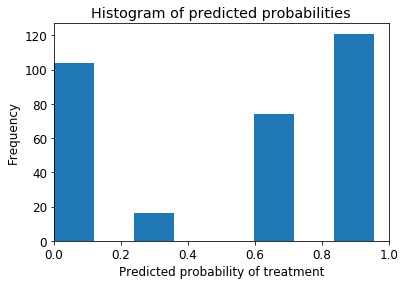

In [20]:
treeClassifier()

Naive Bayes
Accuracy: 0.8158730158730159
Accuracy: 81.58730158730158
Null accuracy:
 1    160
0    155
Name: treatment, dtype: int64
Percentage of ones: 0.5079365079365079
Percentage of zeros: 0.4920634920634921
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


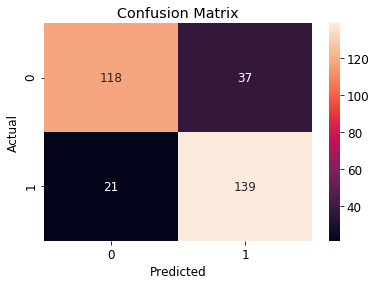

Classification Accuracy: 0.8158730158730159
Classification Error: 0.18412698412698414
False Positive Rate: 0.23870967741935484
Precision: 0.7897727272727273
AUC Score: 0.8150201612903225
Cross-validated AUC: 0.8721332165258577
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 0 0]
First 10 predicted probabilities of class members:
 [[5.73050778e-02 9.42694922e-01]
 [9.99254945e-01 7.45055066e-04]
 [9.98650729e-01 1.34927090e-03]
 [9.67261616e-01 3.27383837e-02]
 [4.32980523e-01 5.67019477e-01]
 [1.28528961e-02 9.87147104e-01]
 [9.63597790e-01 3.64022100e-02]
 [9.49668320e-02 9.05033168e-01]
 [7.70321531e-01 2.29678469e-01]
 [6.37734846e-01 3.62265154e-01]]
First 10 predicted probabilities:
 [[9.42694922e-01]
 [7.45055066e-04]
 [1.34927090e-03]
 [3.27383837e-02]
 [5.67019477e-01]
 [9.87147104e-01]
 [3.64022100e-02]
 [9.05033168e-01]
 [2.29678469e-01]
 [3.62265154e-01]]
[[118  37]
 [ 21 139]]


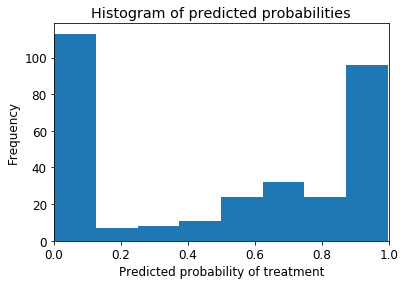

In [21]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Naive Bayes")    
    # make class predictions for the testing set
y_pred_class = nb.predict(X_test)
accuracy_score=evalClassModel(nb, y_test, y_pred_class, True)

Random Forest
Accuracy: 0.7968253968253968
Accuracy: 79.68253968253968
Null accuracy:
 1    160
0    155
Name: treatment, dtype: int64
Percentage of ones: 0.5079365079365079
Percentage of zeros: 0.4920634920634921
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0]


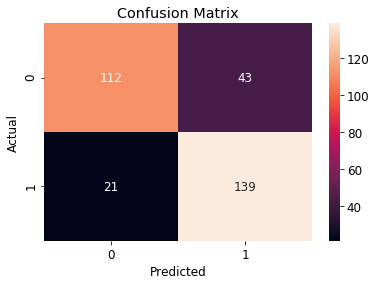

Classification Accuracy: 0.7968253968253968
Classification Error: 0.20317460317460323
False Positive Rate: 0.27741935483870966
Precision: 0.7637362637362637
AUC Score: 0.7956653225806452
Cross-validated AUC: 0.8737177179339479
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.07998186 0.92001814]
 [0.99004069 0.00995931]
 [0.9472366  0.0527634 ]
 [0.87090401 0.12909599]
 [0.31053291 0.68946709]
 [0.1024437  0.8975563 ]
 [0.95116729 0.04883271]
 [0.20550682 0.79449318]
 [0.24096292 0.75903708]
 [0.24982369 0.75017631]]
First 10 predicted probabilities:
 [[0.92001814]
 [0.00995931]
 [0.0527634 ]
 [0.12909599]
 [0.68946709]
 [0.8975563 ]
 [0.04883271]
 [0.79449318]
 [0.75903708]
 [0.75017631]]
[[112  43]
 [ 21 139]]


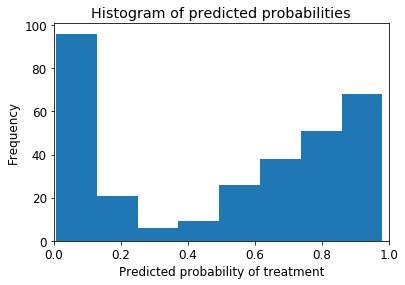

In [22]:
#Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
rforest.fit(X_train, y_train)
print("Random Forest")
    # make class predictions for the testing set
y_pred_class = rforest.predict(X_test)
accuracy_score=evalClassModel(rforest, y_test, y_pred_class, True)

Logistic Regression
Accuracy: 0.7841269841269841
Accuracy: 78.41269841269842
Null accuracy:
 1    160
0    155
Name: treatment, dtype: int64
Percentage of ones: 0.5079365079365079
Percentage of zeros: 0.4920634920634921
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


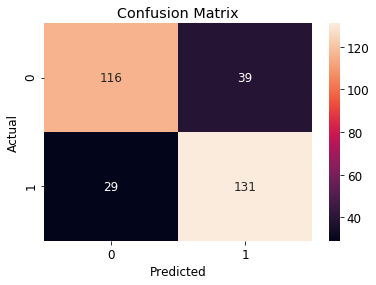

Classification Accuracy: 0.7841269841269841
Classification Error: 0.21587301587301588
False Positive Rate: 0.25161290322580643
Precision: 0.7705882352941177
AUC Score: 0.7835685483870969
Cross-validated AUC: 0.8629558291730671
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 0 0]
First 10 predicted probabilities of class members:
 [[0.06243303 0.93756697]
 [0.94889874 0.05110126]
 [0.93555847 0.06444153]
 [0.80651841 0.19348159]
 [0.26691471 0.73308529]
 [0.05562949 0.94437051]
 [0.87660006 0.12339994]
 [0.15453137 0.84546863]
 [0.66114407 0.33885593]
 [0.59216876 0.40783124]]
First 10 predicted probabilities:
 [[0.93756697]
 [0.05110126]
 [0.06444153]
 [0.19348159]
 [0.73308529]
 [0.94437051]
 [0.12339994]
 [0.84546863]
 [0.33885593]
 [0.40783124]]
[[116  39]
 [ 29 131]]


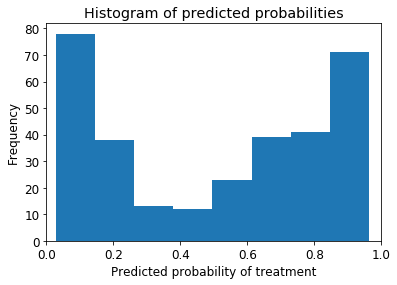

In [23]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
lg.fit(X_train, y_train)
print("Logistic Regression")    
    # make class predictions for the testing set
y_pred_class = lg.predict(X_test)
accuracy_score=evalClassModel(lg, y_test, y_pred_class, True)

Accuracy: 0.819047619047619
Accuracy: 81.9047619047619
Null accuracy:
 1    160
0    155
Name: treatment, dtype: int64
Percentage of ones: 0.5079365079365079
Percentage of zeros: 0.4920634920634921
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


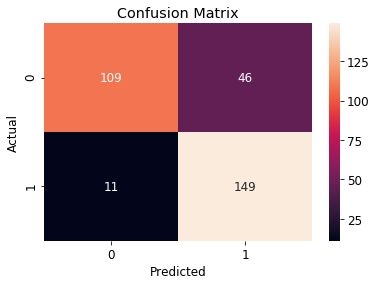

Classification Accuracy: 0.819047619047619
Classification Error: 0.18095238095238098
False Positive Rate: 0.2967741935483871
Precision: 0.764102564102564
AUC Score: 0.8172379032258065
Cross-validated AUC: 0.832169658858167
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.21875    0.78125   ]
 [0.99107143 0.00892857]
 [0.99107143 0.00892857]
 [0.93814433 0.06185567]
 [0.31382979 0.68617021]
 [0.21875    0.78125   ]
 [0.93814433 0.06185567]
 [0.1440678  0.8559322 ]
 [0.21875    0.78125   ]
 [0.21875    0.78125   ]]
First 10 predicted probabilities:
 [[0.78125   ]
 [0.00892857]
 [0.00892857]
 [0.06185567]
 [0.68617021]
 [0.78125   ]
 [0.06185567]
 [0.8559322 ]
 [0.78125   ]
 [0.78125   ]]
[[109  46]
 [ 11 149]]


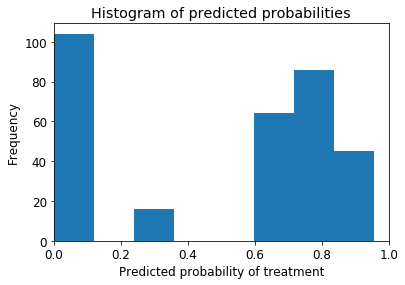

In [24]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
tree.fit(X_train, y_train)
y_pred_class = tree.predict(X_test)
accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)